In [4]:
#Import Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, inconsistent
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import plotly.express as px

sns.set()

In [5]:
# Import the files
analyse = pd.read_csv('analyse.csv')
population = pd.read_csv('analyse_population.csv')

# Check the head of the df
analyse.head()

Zone  \
0     Afghanistan   
1  Afrique du Sud   
2         Albanie   
3         Algérie   
4       Allemagne   

   Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53                             
1                                              35.69                             
2                                              16.36                             
3                                               6.38                             
4                                              19.47                             

   PIB (US$) par habitant  Stabilité Politique  \
0              520.616409                -2.80   
1             6680.460869                -0.28   
2             4514.204908                 0.38   
3             4109.696067                -0.92   
4            44651.829102                 0.59   

   Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
0                                           0.705963                    
1                                         261.808033                    
2                                          15.603914                    
3                                         261.808033                    
4                                         685.475196                    

   Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
0                                             0.3632                                        
1                                             0.3164                                        
2                                             0.8127                                        
3                                             1.7491                                        
4                                             0.4118                                        

   Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
0                                           7.946305                                                          
1                                          16.201964                                                          
2                                          23.757276                                                          
3                                          46.581246                                                          
4                                          52.622785

## Hierarchical Cluster Analysis

In [6]:
# Separate the countries
pays = analyse['Zone'].values

In [7]:
# Separate the quantitative values
X = analyse.drop(columns='Zone').values
X[:10]

array([[ 1.53000000e+00,  5.20616409e+02, -2.80000000e+00,
         7.05962592e-01,  3.63200000e-01,  7.94630543e+00],
       [ 3.56900000e+01,  6.68046087e+03, -2.80000000e-01,
         2.61808033e+02,  3.16400000e-01,  1.62019637e+01],
       [ 1.63600000e+01,  4.51420491e+03,  3.80000000e-01,
         1.56039136e+01,  8.12700000e-01,  2.37572764e+01],
       [ 6.38000000e+00,  4.10969607e+03, -9.20000000e-01,
         2.61808033e+02,  1.74910000e+00,  4.65812461e+01],
       [ 1.94700000e+01,  4.46518291e+04,  5.90000000e-01,
         6.85475196e+02,  4.11800000e-01,  5.26227846e+01],
       [ 1.05600000e+01,  4.09581169e+03, -3.80000000e-01,
         4.45269404e+01,  3.57560000e+00,  6.62714394e+00],
       [ 5.41000000e+01,  1.53834152e+04,  7.50000000e-01,
         2.02599920e+00,  1.57677000e+01,  5.91033890e+01],
       [ 4.33600000e+01,  2.08024643e+04, -6.40000000e-01,
         2.61808033e+02,  1.00470000e+00,  4.02079334e+01],
       [ 4.22400000e+01,  1.46488460e+04,  1.700

In [8]:
#Instantiate the scaler
std_scale = preprocessing.StandardScaler()

#Train the scaler
std_scale.fit(X)

#Transform the data
X_scaled = std_scale.transform(X)

In [9]:
#Confirm that the mean is 0 and the standard deviation is 1
pd.DataFrame(X_scaled).describe().round(2).iloc[1:3:, : ]

0    1    2    3    4    5
mean -0.0  0.0  0.0  0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

In [10]:
#Calculate distances with the Ward method
Z = linkage(X_scaled, method="ward")

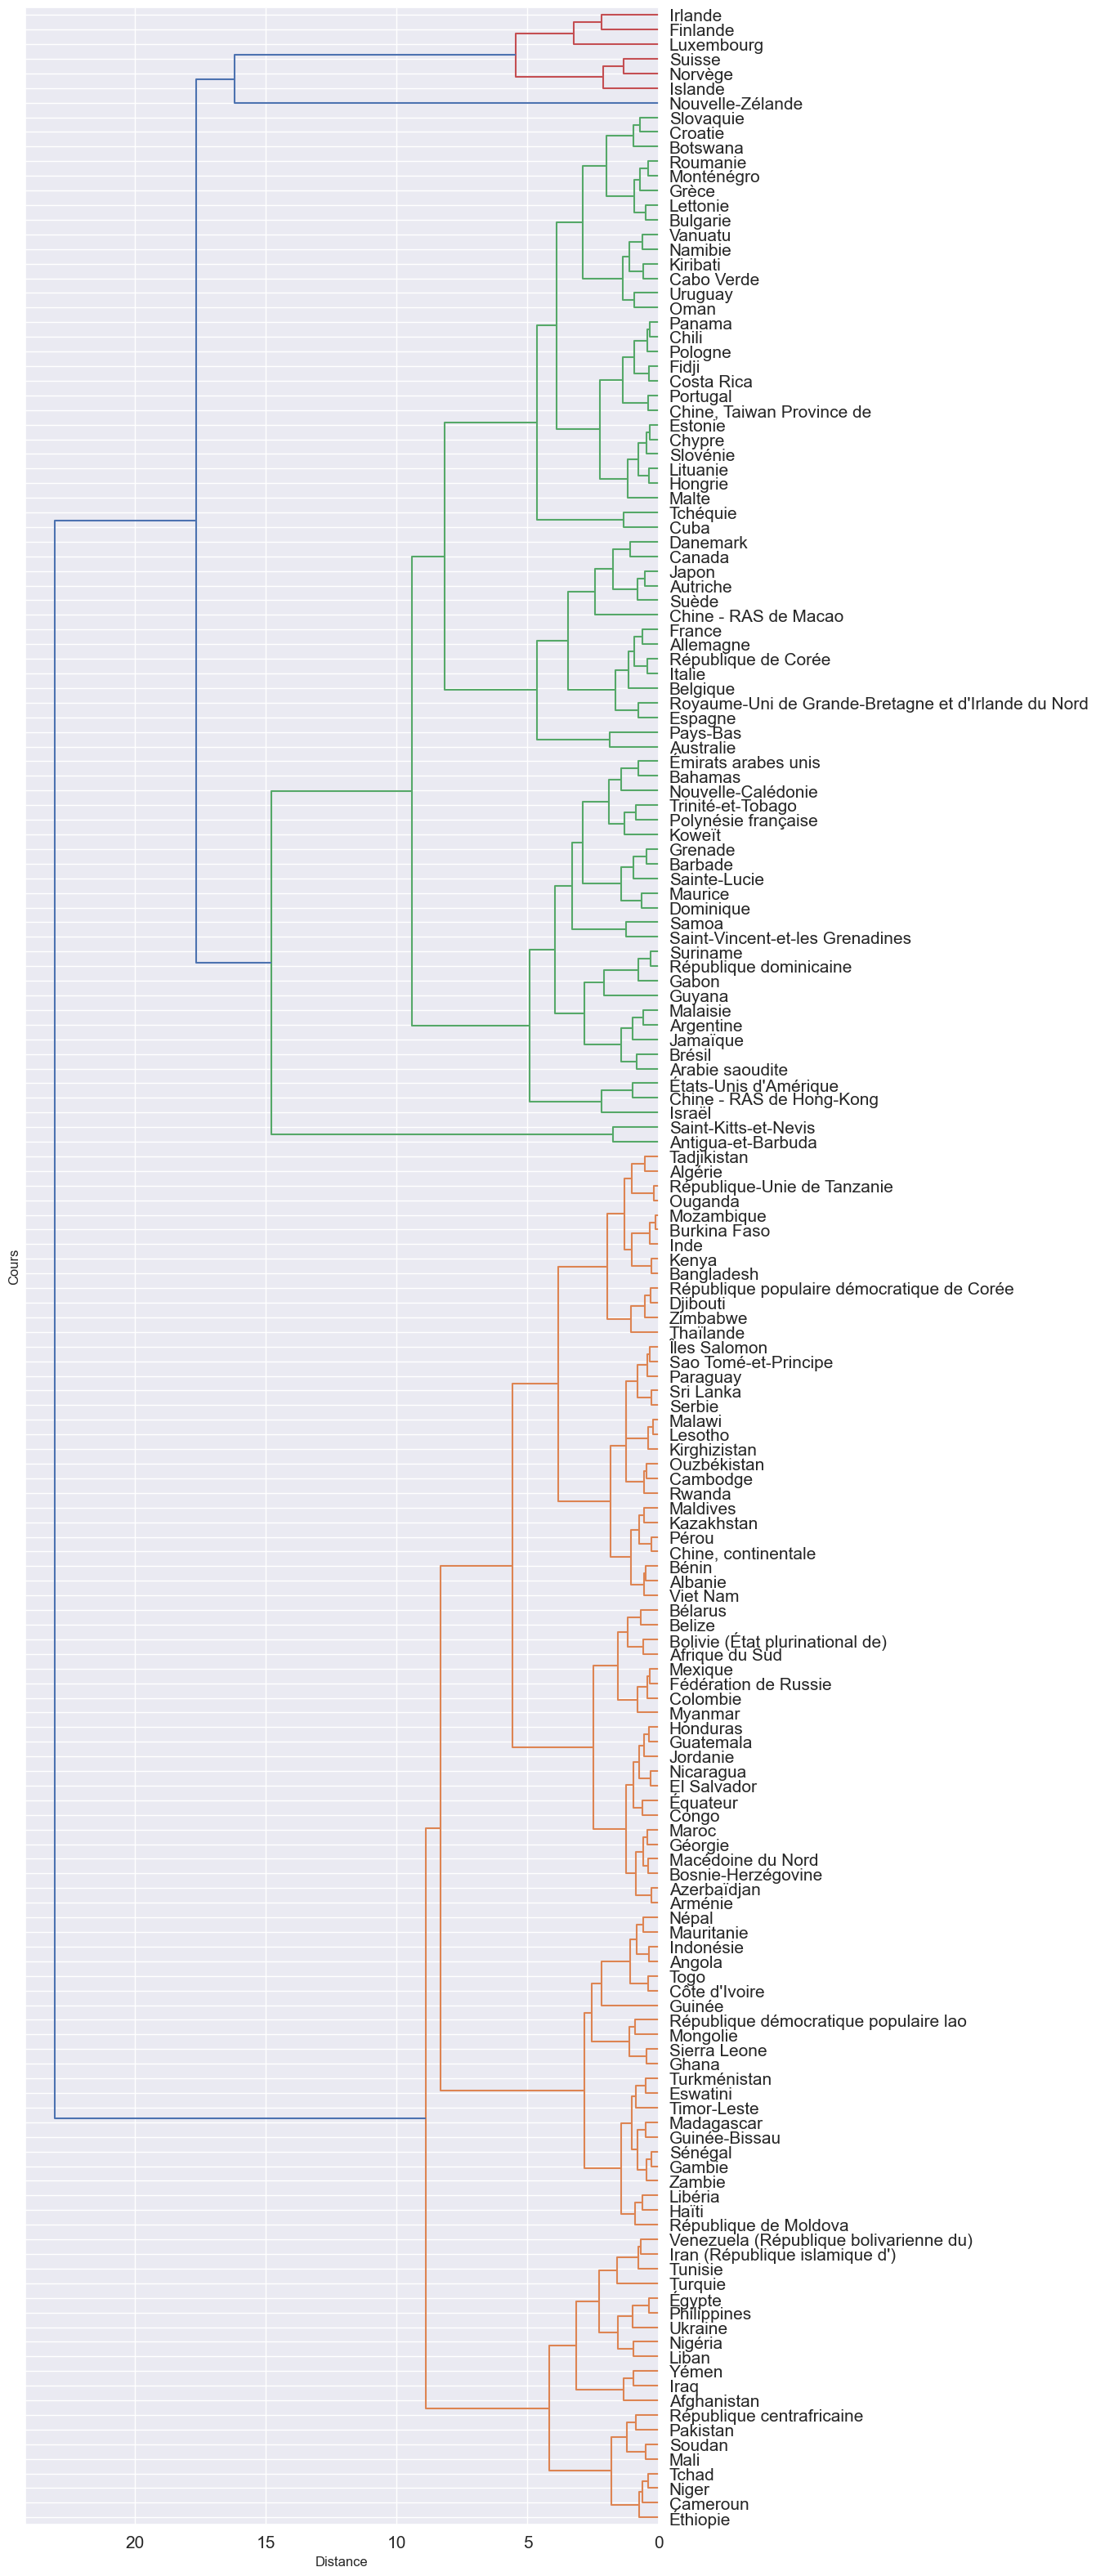

In [11]:
#Create a dendrogram
fig, ax = plt.subplots(1, 1, figsize=(10, 40))

_ = dendrogram(Z, ax=ax, labels=pays, orientation="left")
ax.set_xlabel("Distance")
ax.set_ylabel("Cours")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

plt.show()

In [12]:
# Specify the range of cluster numbers to test
min_clusters = 2
max_clusters = 10
cluster_range = range(min_clusters, max_clusters + 1)

# Calculate the Davies-Bouldin index for the clusters
davies_bouldin_scores = []

for n_clusters in cluster_range:
    # Perform hierarchical clustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clusters = clusterer.fit_predict(Z)

    # Calculate Davies-Bouldin Index
    db_score = davies_bouldin_score(Z, clusters)
    davies_bouldin_scores.append(db_score)

#Find the optimal number of clusters to minimize the Davies-Bouldin index
optimal_clusters = cluster_range[davies_bouldin_scores.index(min(davies_bouldin_scores))]

# Create a graph with the Davies-Bouldin index
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.title("Davies-Bouldin Index for different numbers of clusters")
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label='Optimal Clusters')
plt.legend()
plt.show()

print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 2


In [13]:
#Silhouette score to check for optimal cluster numbers
silhouette_scores = []

for n_clusters in range(2, 11):
    # Perform hierarchical clustering
    model = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = model.fit_predict(X_scaled)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different numbers of clusters')
plt.show()

In [14]:
# Define the number of clusters
k=3

# Define the clusters
clusters = fcluster(Z, k, criterion='maxclust')

In [15]:
#Create a contingency table
crosstab = pd.crosstab(pays, clusters, dropna=False)
crosstab.rename_axis(columns="cluster", index="Pays", inplace=True)
crosstab

cluster                1  2  3
Pays                          
Afghanistan            1  0  0
Afrique du Sud         1  0  0
Albanie                1  0  0
Algérie                1  0  0
Allemagne              0  1  0
...                   .. .. ..
Émirats arabes unis    0  1  0
Équateur               1  0  0
États-Unis d'Amérique  0  1  0
Éthiopie               1  0  0
Îles Salomon           1  0  0

[172 rows x 3 columns]

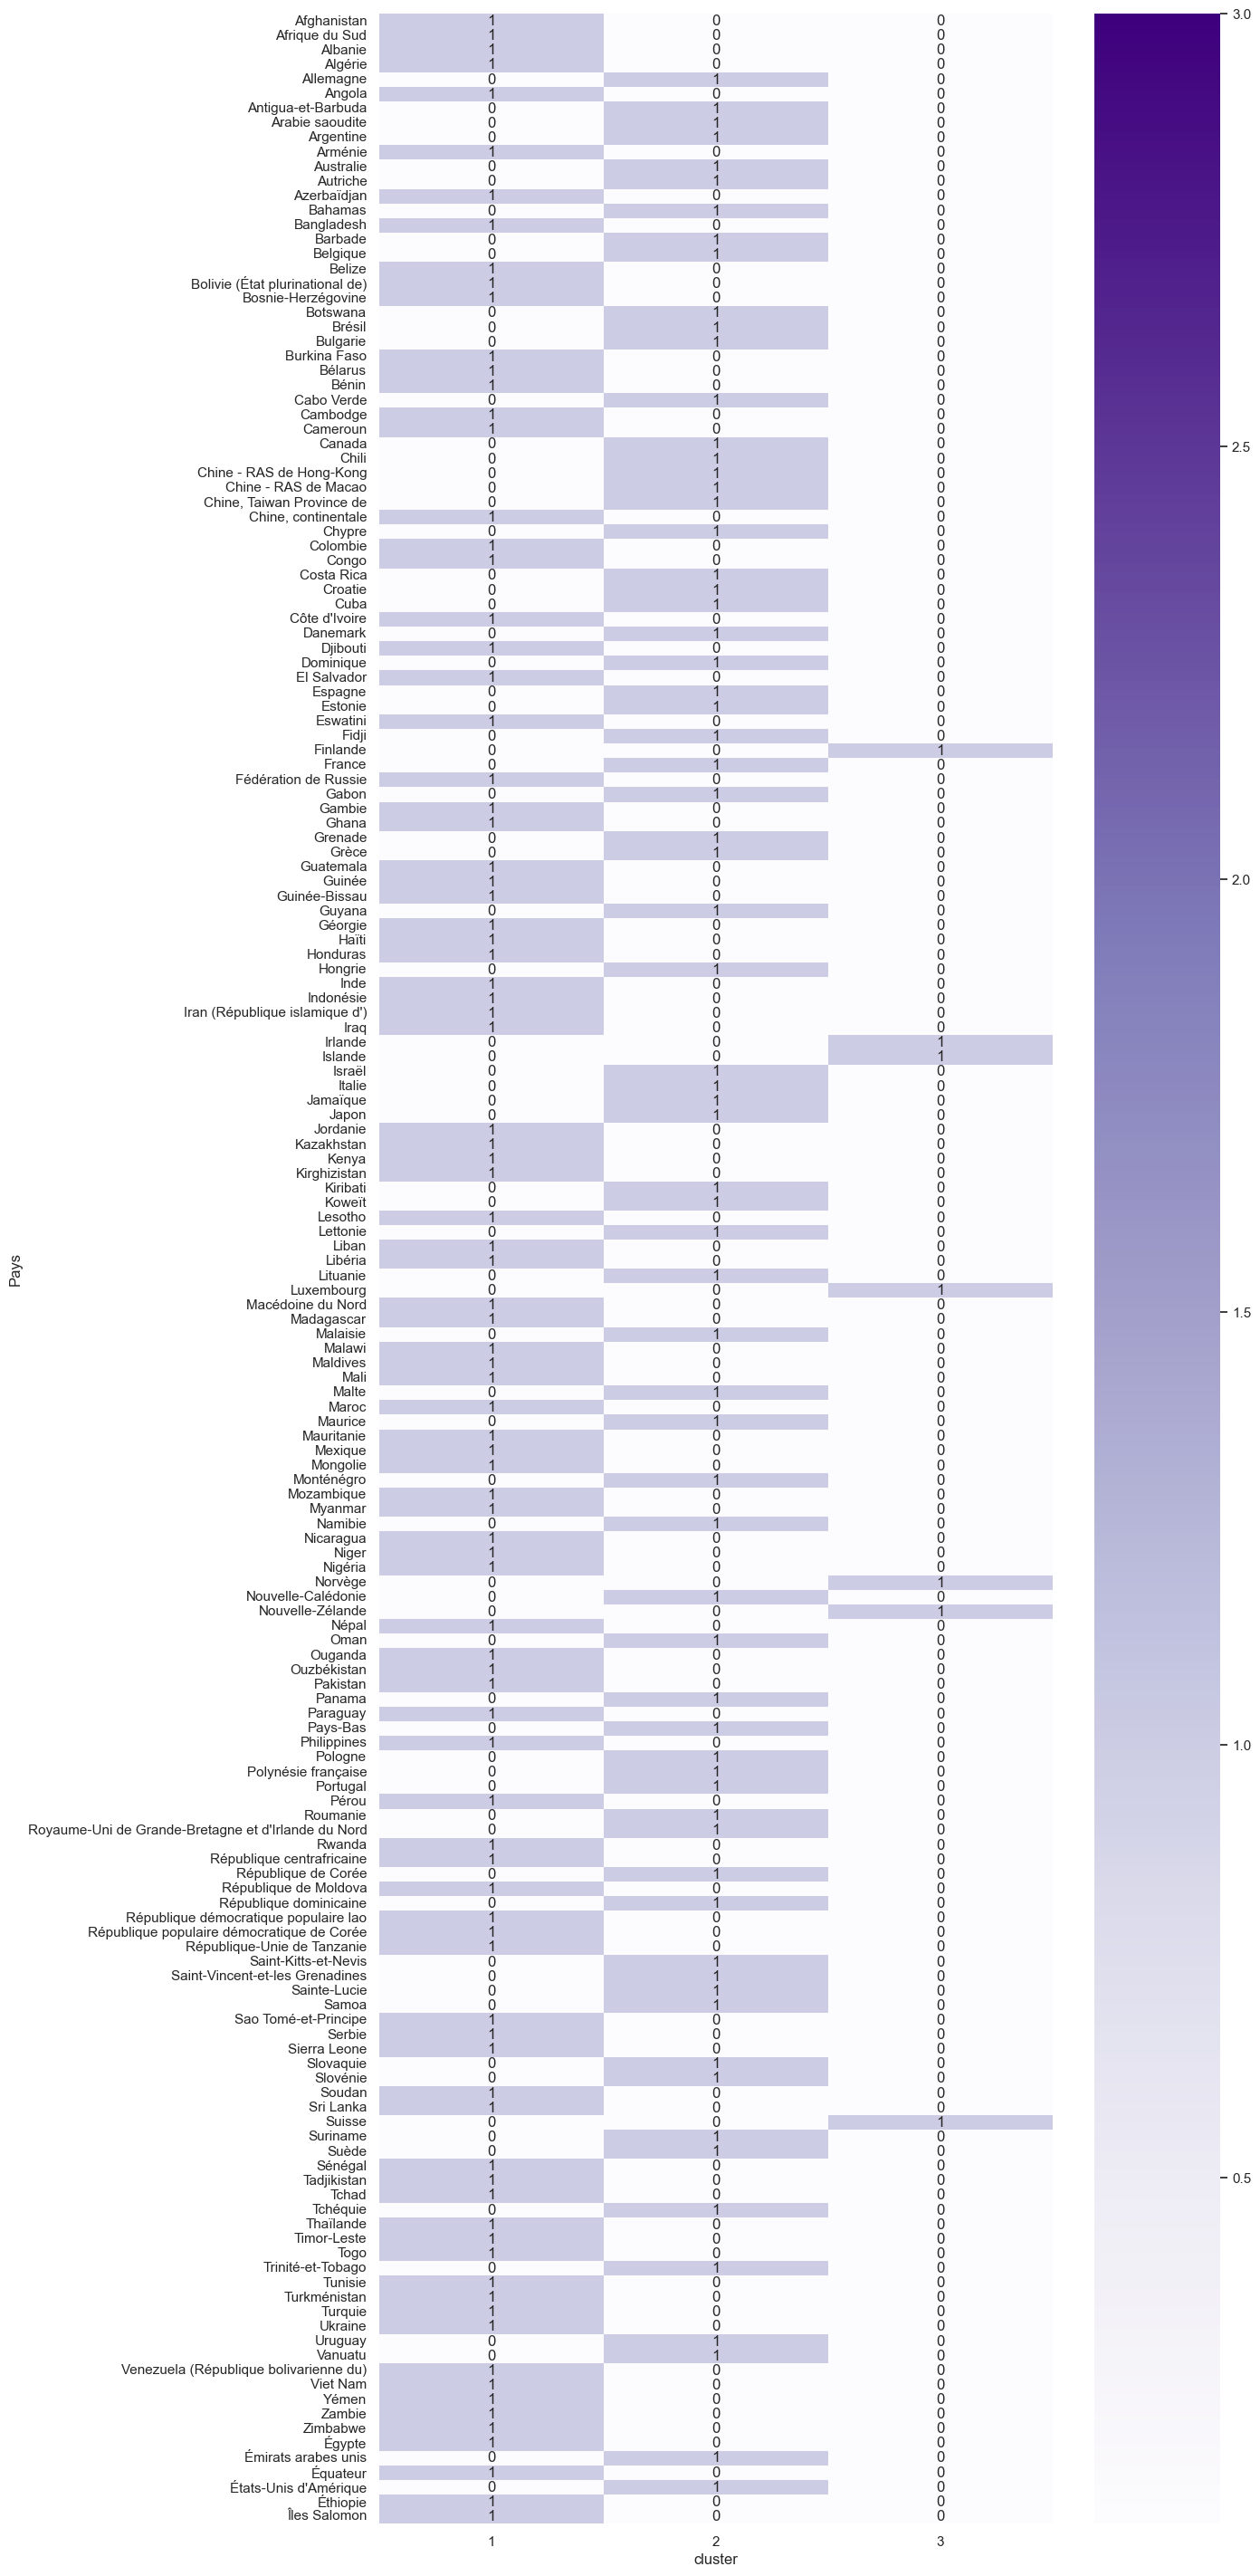

In [16]:
#Create a heatmap with the cross tab
fig, ax = plt.subplots(1,1, figsize=(12,36))
ax = sns.heatmap(crosstab, vmin=0.1, vmax=3, annot=True, cmap="Purples")

In [17]:
#Add the corresponding cluster to each country
df_CAH = pd.DataFrame({"pays" : pays, "cluster" : clusters})

In [18]:
#Show the countries in each cluster
for i in range(1, 4) : 
    # Make a selection
    sub_df = df_CAH.loc[df_CAH.cluster == i]

    #The cluster in question
    print(f"cluster : {i}")

    # Extract the countries' names
    pays_list = sub_df['pays'].values

    # Create a list of countries for each cluster
    txt = [f"{name}" for name in pays_list]

    # Make it into a string
    txt = " / ".join(txt)
 
    #Print the clusters
    print(txt)
    print("\n\n")

cluster : 1
Afghanistan / Afrique du Sud / Albanie / Algérie / Angola / Arménie / Azerbaïdjan / Bangladesh / Belize / Bolivie (État plurinational de) / Bosnie-Herzégovine / Burkina Faso / Bélarus / Bénin / Cambodge / Cameroun / Chine, continentale / Colombie / Congo / Côte d'Ivoire / Djibouti / El Salvador / Eswatini / Fédération de Russie / Gambie / Ghana / Guatemala / Guinée / Guinée-Bissau / Géorgie / Haïti / Honduras / Inde / Indonésie / Iran (République islamique d') / Iraq / Jordanie / Kazakhstan / Kenya / Kirghizistan / Lesotho / Liban / Libéria / Macédoine du Nord / Madagascar / Malawi / Maldives / Mali / Maroc / Mauritanie / Mexique / Mongolie / Mozambique / Myanmar / Nicaragua / Niger / Nigéria / Népal / Ouganda / Ouzbékistan / Pakistan / Paraguay / Philippines / Pérou / Rwanda / République centrafricaine / République de Moldova / République démocratique populaire lao / République populaire démocratique de Corée / République-Unie de Tanzanie / Sao Tomé-et-Principe / Serbie / 

In [19]:
#Join the clusters and the 'analyse' file
analyse_CAH = pd.merge(df_CAH, analyse, left_on='pays', right_on='Zone', how='left').drop(columns='Zone')

#Create the 'cluster1', 'cluster2' and 'cluster3' dataframes
cluster1 = analyse_CAH.loc[analyse_CAH['cluster']==1].drop(columns='cluster')
cluster2 = analyse_CAH.loc[analyse_CAH['cluster']==2].drop(columns='cluster')
cluster3 = analyse_CAH.loc[analyse_CAH['cluster']==3].drop(columns='cluster')

In [20]:
#Check the values of columns in the Cluster1 df
cluster1.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                          94.000000                             
mean                                           10.992128                             
std                                             9.428647                             
min                                             0.130000                             
25%                                             2.927500                             
50%                                             7.855000                             
75%                                            16.615000                             
max                                            36.000000                             

       PIB (US$) par habitant  Stabilité Politique  \
count               94.000000            94.000000   
mean              3208.701342            -0.642553   
std               2621.372703             0.725759   
min                450.900697            -2.940000   
25%               1110.700171            -0.930000   
50%               2240.876301            -0.515000   
75%               4234.952392            -0.092500   
max              10817.003315             0.790000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                          94.000000                    
mean                                          127.657218                    
std                                           120.875673                    
min                                             0.239632                    
25%                                            15.780070                    
50%                                            83.416275                    
75%                                           261.808033                    
max                                           574.153603                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                          94.000000                                        
mean                                            1.568115                                        
std                                             1.372310                                        
min                                             0.000000                                        
25%                                             0.396250                                        
50%                                             1.124800                                        
75%                                             2.424975                                        
max                                             6.743400                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                          94.000000                                                          
mean                                           23.296896                                                          
std                                            21.274666                                                          
min                                             1.275991                                                          
25%                                             6.958895                                                          
50%                                            15.654978                                                          
75%                                            34.995588                                                          
max                                           104.053370

In [21]:
#Check the values of columns in the Cluster2 df
cluster2.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                          71.000000                             
mean                                           32.127042                             
std                                            15.264819                             
min                                             3.390000                             
25%                                            19.900000                             
50%                                            30.300000                             
75%                                            43.265000                             
max                                            72.310000                             

       PIB (US$) par habitant  Stabilité Politique  \
count               71.000000            71.000000   
mean             22827.124994             0.579718   
std              16982.667101             0.453740   
min               1648.434906            -0.890000   
25%              10040.757973             0.285000   
50%              17404.023659             0.650000   
75%              32352.025134             0.915000   
max              81018.552734             1.430000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                          71.000000                    
mean                                          290.999432                    
std                                           377.117124                    
min                                             2.025999                    
25%                                            87.894577                    
50%                                           261.808033                    
75%                                           261.808033                    
max                                          2291.704118                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                          71.000000                                        
mean                                            1.269815                                        
std                                             2.458214                                        
min                                             0.032400                                        
25%                                             0.277450                                        
50%                                             0.463300                                        
75%                                             1.525700                                        
max                                            15.767700                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                          71.000000                                                          
mean                                           64.076642                                                          
std                                            42.640650                                                          
min                                             0.000000                                                          
25%                                            42.320342                                                          
50%                                            52.622785                                                          
75%                                            76.515314                                                          
max                                           267.514953

In [22]:
#Check the values of columns in the Cluster3 df
cluster3.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                           7.000000                             
mean                                           23.202857                             
std                                             7.110536                             
min                                            15.720000                             
25%                                            18.545000                             
50%                                            19.050000                             
75%                                            27.885000                             
max                                            34.790000                             

       PIB (US$) par habitant  Stabilité Politique  \
count                7.000000             7.000000   
mean             72085.325618             1.255714   
std              22764.139497             0.198566   
min              43943.484628             1.000000   
25%              58576.507401             1.125000   
50%              73949.769215             1.260000   
75%              79266.914217             1.340000   
max             111017.182246             1.600000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                           7.000000                    
mean                                         1767.177638                    
std                                          3275.143674                    
min                                           261.808033                    
25%                                           261.808033                    
50%                                           339.003923                    
75%                                          1049.402869                    
max                                          9147.009709                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                           7.000000                                        
mean                                            0.241414                                        
std                                             0.140373                                        
min                                             0.007800                                        
25%                                             0.162400                                        
50%                                             0.293400                                        
75%                                             0.316400                                        
max                                             0.431100                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                           7.000000                                                          
mean                                          330.252736                                                          
std                                           161.736204                                                          
min                                           102.479055                                                          
25%                                           224.182132                                                          
50%                                           305.818643                                                          
75%                                           448.151814                                                          
max                                           558.803563

-----------------------------------------------------------------------------------------------------
Column: Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
-----------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------
Column: PIB (US$) par habitant
-----------------------------------------------------------------------------------------------------


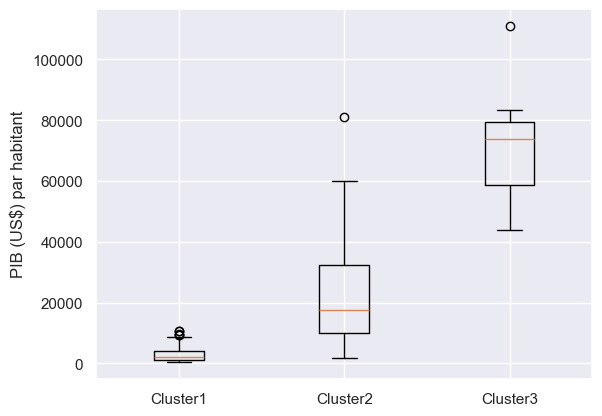

-----------------------------------------------------------------------------------------------------
Column: Stabilité Politique
-----------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------
Column: Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
-----------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------
Column: Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)
-----------------------------------------------------------------------------------------------------


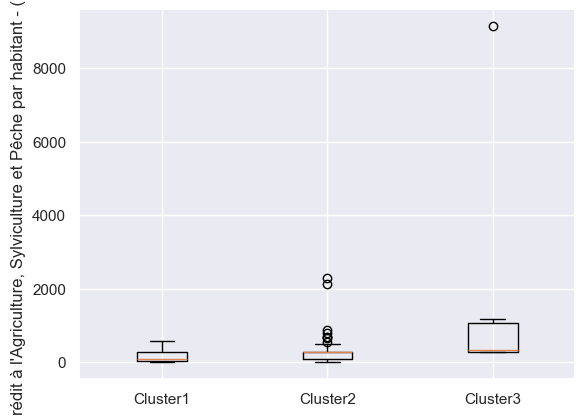

-----------------------------------------------------------------------------------------------------
Column: Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)
-----------------------------------------------------------------------------------------------------


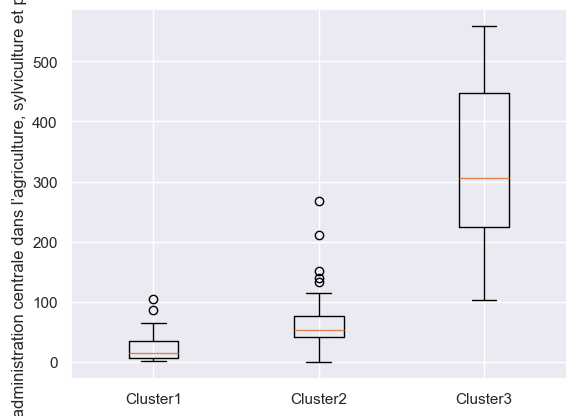

In [23]:
columns = ['Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)',
 'PIB (US$) par habitant',
 'Stabilité Politique',
 "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)",
 "Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)",
 "Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"]

clusters = [('Cluster1', cluster1), ('Cluster2', cluster2), ('Cluster3', cluster3)]

for column in columns:
    print('-----------------------------------------------------------------------------------------------------')
    print("Column:", column)
    print('-----------------------------------------------------------------------------------------------------')

    data = [cluster[column] for _, cluster in clusters]
    labels = [cluster_name for cluster_name, _ in clusters]

    plt.boxplot(data, labels=labels)
    plt.ylabel(column)
    plt.show()

-----------------------------------------------------------------------------------------------------
Column: Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
-----------------------------------------------------------------------------------------------------


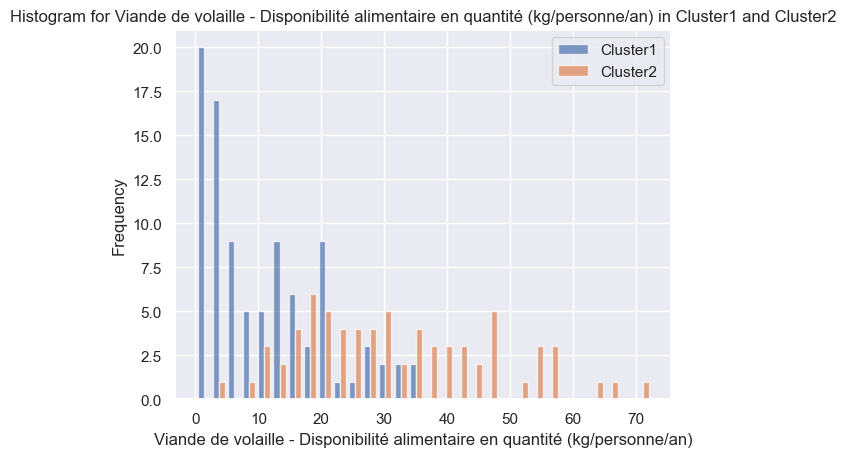

-----------------------------------------------------------------------------------------------------
Column: PIB (US$) par habitant
-----------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------
Column: Stabilité Politique
-----------------------------------------------------------------------------------------------------


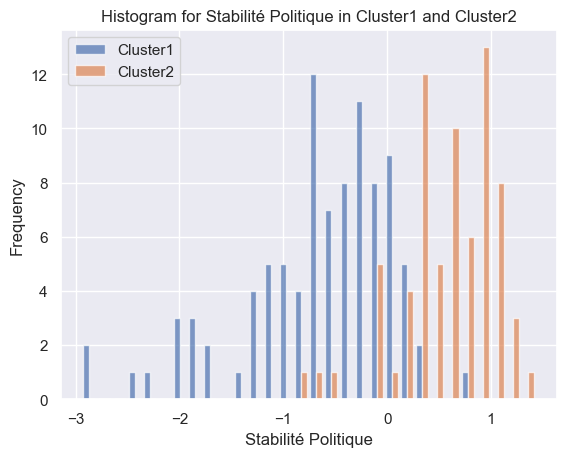

-----------------------------------------------------------------------------------------------------
Column: Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
-----------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------
Column: Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)
-----------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------
Column: Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)
-----------------------------------------------------------------------------------------------------


In [24]:
columns = ['Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)',
 'PIB (US$) par habitant',
 'Stabilité Politique',
 "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)",
 "Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)",
 "Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"]

clusters = [('Cluster1', cluster1), ('Cluster2', cluster2)]

for column in columns:
    print('-----------------------------------------------------------------------------------------------------')
    print("Column:", column)
    print('-----------------------------------------------------------------------------------------------------')

    data = [cluster[column] for _, cluster in clusters]

    plt.hist(data, bins=30, alpha=0.7, label=[cluster_name for cluster_name, _ in clusters])
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {column} in Cluster1 and Cluster2")
    plt.legend()
    plt.show()

- Cluster 1 - Less available chicken, lower GDP per capita, lower political stability, lower proportion of available chicken to total available meat, higher emissions, less access to agricultural credit, less investment of central government in agriculture
- Cluster 2 – More chicken available, higher GDP per capita, greater political stability, higher proportion of chicken available to total meat available, lower emissions, with 2 high outliers, more access to credit agricultural, more central government investment in agriculture
- Cluster 3 - High political stability, high GDP, high credit to agrculture, low emissions and high government investment per capita. However, only a medium level of chicken consumption.

## K-means

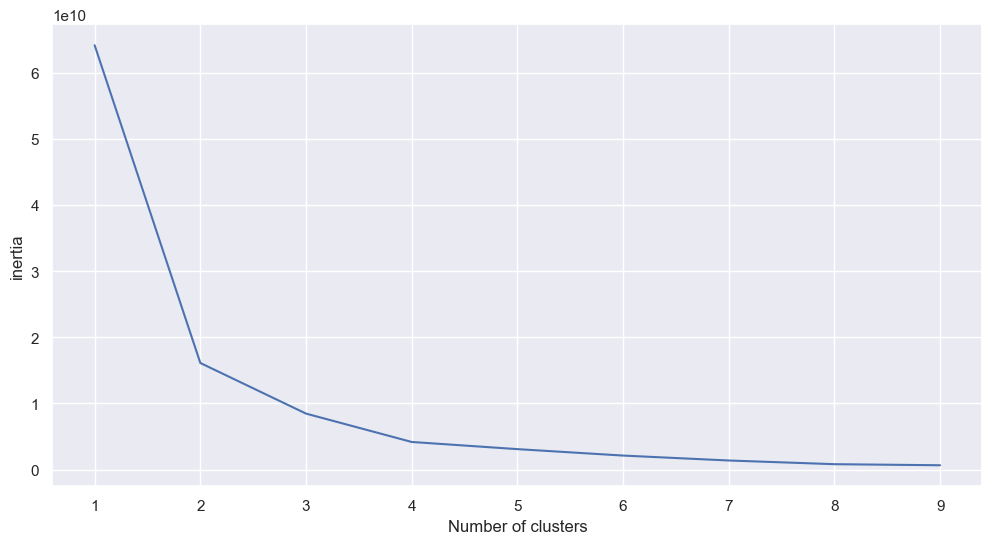

In [25]:
# There is a known memory leak in Windows when using the k-mean function. This is a workaround.
os.environ['OMP_NUM_THREADS'] = '1'

# Create a list to record inertia
inertia_list = [ ]

# Create a list with the number of clusters
k_list = range(1, 10)

# For each number of clusters : 
for k in k_list : 
    
    # Instanciate a k-means for k clusters
    kmeans = KMeans(n_clusters=k, n_init=10)
    
    # Train it
    kmeans.fit(X)
    
    # Record the inertia obtained
    inertia_list.append(kmeans.inertia_)
    
#Create a graph that plots intraclass inertia versus number of clusters
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("Number of clusters")

ax = plt.plot(k_list, inertia_list)

I should select the k value after which the inertia starts to decrease linearly - I can see here that k should = 4.

In [26]:
# Instantiate k-means with 4 clusters
kmeans = KMeans(n_clusters=4,n_init=10)

# Train the k-means
kmeans.fit(X)

# Put the k-means cluster in the 'labels' variable
labels = kmeans.labels_ + 1
labels

array([2, 2, 2, 2, 1, 2, 4, 4, 4, 2, 1, 1, 2, 4, 2, 4, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 3, 4, 2, 4, 2, 2, 2, 4, 2, 2, 1, 2,
       2, 2, 4, 4, 2, 2, 1, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 3, 3, 1, 4, 2, 1, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 3,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 1,
       2, 4, 2, 2, 2, 4, 2, 1, 2, 4, 4, 4, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 3, 2, 1, 2, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2])

In [27]:
# Put centroids in the 'cluster_centers_' variable
centroids = kmeans.cluster_centers_

In [28]:
#Create a PCA and train it
pca = PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

In [29]:
#Instanciate the scaler
scaler = StandardScaler()

#Train the scaler and transform the data
X_scaled = scaler.fit_transform(X)

In [30]:
#Project the points in the new space
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3", "PC4"])
X_proj[:10]

PC1       PC2       PC3       PC4
0 -2.635226 -1.345041 -0.404487  0.449000
1 -0.105763 -0.062146  0.216609 -1.177497
2 -0.340909 -0.135179 -0.144618 -0.410748
3 -1.155205 -0.361969 -0.001596  0.669939
4  1.458211 -0.614276  0.155423  0.064284
5 -1.239686  0.735635  0.276726  0.526365
6  0.009255  7.432008  1.957068  2.045175
7  0.367743  0.333824  0.117607 -0.980971
8  0.527714  0.114293  0.166551 -1.510127
9 -0.838725 -0.551231 -0.182074 -0.303360

In [31]:
# Use the scaler with the centroids
centroids_scaled = scaler.fit_transform(centroids)

# # Use the PCA with the scaled centroids
centroids_proj = pca.transform(centroids_scaled)

# Create a dataframe with the centroids_proj
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4"], 
                              index=["cluster_0", "cluster_1", "cluster_2", "cluster_3"])

centroids_proj

F1        F2        F3        F4
cluster_0  1.064028 -0.868911  1.386621 -0.947632
cluster_1 -2.776450  0.200591 -0.376912  0.818045
cluster_2  2.283633 -0.827268 -1.089154  0.647885
cluster_3 -0.571211  1.495588  0.079444 -0.518298

In [32]:
# Create a scatterplot with the centroids
#Define the figure and its axis
fig, ax = plt.subplots(1,1, figsize=(8,7))

# Show individuals, with 50% transparency
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)

# Display the centroids, in black and with a square shape
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="blue" )

# Create the graph
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

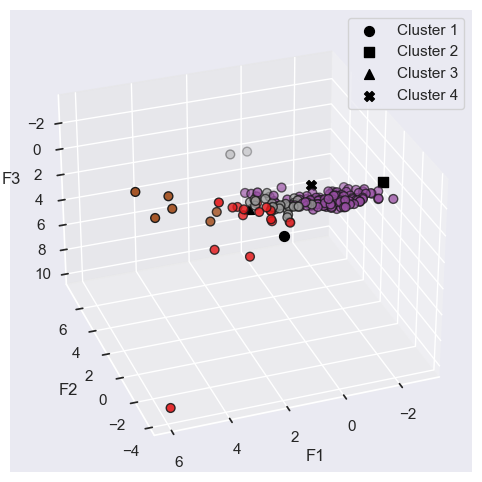

In [33]:
#Créez a graph in 3D 
# Define figure and axis
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Show the points
ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, cmap="Set1", edgecolor="k", s=40
)

# Add the centroids
shapes = ['o', 's', '^', 'X']
for i, centroid in enumerate(centroids_proj.values):
    ax.scatter(
        centroid[0],
        centroid[1],
        centroid[2],
        c="black", marker=shapes[i % len(shapes)], s=50, label=f"Cluster {i + 1}"
    )

# Name the axes
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

ax.legend()

plt.show()

In [34]:
# Create a new dataframe for k-means analysis with 'Zone' and 'Cluster' columns
df_kmeans = analyse.copy()
df_kmeans['Cluster'] = labels
df_kmeans = df_kmeans[['Zone', 'Cluster']]

In [35]:
#Show countries in each cluster
for i in range(1, 5) : 
    # Select a cluster
    sub_df = df_kmeans.loc[df_kmeans['Cluster'] == i]

    # Print cluster number
    print(f"Cluster: {i}")

    # Extract the countries in the cluster
    pays_list = sub_df['Zone'].values

    # Create a list of the countries in the cluster
    txt = [f"{name}" for name in pays_list]

    # Transform into a string
    txt = " / ".join(txt)
 
    # Print clusters and their corresponding countries
    print(txt)
    print("\n\n")

Cluster: 1
Allemagne / Australie / Autriche / Belgique / Canada / Chine - RAS de Hong-Kong / Danemark / Finlande / France / Israël / Japon / Nouvelle-Zélande / Pays-Bas / Royaume-Uni de Grande-Bretagne et d'Irlande du Nord / Suède / Émirats arabes unis / États-Unis d'Amérique



Cluster: 2
Afghanistan / Afrique du Sud / Albanie / Algérie / Angola / Arménie / Azerbaïdjan / Bangladesh / Belize / Bolivie (État plurinational de) / Bosnie-Herzégovine / Botswana / Brésil / Bulgarie / Burkina Faso / Bélarus / Bénin / Cabo Verde / Cambodge / Cameroun / Chine, continentale / Colombie / Congo / Costa Rica / Cuba / Côte d'Ivoire / Djibouti / Dominique / El Salvador / Eswatini / Fidji / Fédération de Russie / Gabon / Gambie / Ghana / Grenade / Guatemala / Guinée / Guinée-Bissau / Guyana / Géorgie / Haïti / Honduras / Inde / Indonésie / Iran (République islamique d') / Iraq / Jamaïque / Jordanie / Kazakhstan / Kenya / Kirghizistan / Kiribati / Lesotho / Liban / Libéria / Macédoine du Nord / Madagas

In [36]:
cluster1 = df_kmeans.loc[df_kmeans['Cluster']==1]
cluster2 = df_kmeans.loc[df_kmeans['Cluster']==2]
cluster3 = df_kmeans.loc[df_kmeans['Cluster']==3]
cluster4 = df_kmeans.loc[df_kmeans['Cluster']==4]

cluster1 = pd.merge(cluster1, analyse, left_on='Zone', right_on='Zone', how='left').drop(columns=['Cluster', 'Zone'])
cluster2 = pd.merge(cluster2, analyse, left_on='Zone', right_on='Zone', how='left').drop(columns=['Cluster', 'Zone'])
cluster3 = pd.merge(cluster3, analyse, left_on='Zone', right_on='Zone', how='left').drop(columns=['Cluster', 'Zone'])
cluster4 = pd.merge(cluster4, analyse, left_on='Zone', right_on='Zone', how='left').drop(columns=['Cluster', 'Zone'])

In [37]:
#Look at the values of each column of Cluster 1
cluster1.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                          17.000000                             
mean                                           32.343529                             
std                                            16.302052                             
min                                            12.650000                             
25%                                            18.760000                             
50%                                            28.980000                             
75%                                            43.470000                             
max                                            67.390000                             

       PIB (US$) par habitant  Stabilité Politique  \
count               17.000000            17.000000   
mean             47028.830993             0.714706   
std               6642.226363             0.540487   
min              38672.407740            -0.890000   
25%              43096.069694             0.430000   
50%              44906.748920             0.870000   
75%              48989.638816             1.050000   
max              59914.642691             1.600000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                          17.000000                    
mean                                         1101.044152                    
std                                          2171.536794                    
min                                            61.047445                    
25%                                           261.808033                    
50%                                           339.003923                    
75%                                           685.475196                    
max                                          9147.009709                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                          17.000000                                        
mean                                            0.351412                                        
std                                             0.292915                                        
min                                             0.041400                                        
25%                                             0.197700                                        
50%                                             0.272000                                        
75%                                             0.373500                                        
max                                             1.324200                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                          17.000000                                                          
mean                                           75.062922                                                          
std                                            63.430181                                                          
min                                             0.000000                                                          
25%                                            52.622785                                                          
50%                                            61.363334                                                          
75%                                            72.335881                                                          
max                                           305.818643

In [38]:
#Look at the values of each column of Cluster 2
cluster2.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                         118.000000                             
mean                                           15.390085                             
std                                            14.368705                             
min                                             0.130000                             
25%                                             3.685000                             
50%                                            11.995000                             
75%                                            21.575000                             
max                                            72.310000                             

       PIB (US$) par habitant  Stabilité Politique  \
count              118.000000           118.000000   
mean              4064.948319            -0.405424   
std               3140.110138             0.826594   
min                450.900697            -2.940000   
25%               1385.805021            -0.767500   
50%               3312.091996            -0.310000   
75%               6191.356474             0.090000   
max              12225.577172             1.200000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                         118.000000                    
mean                                          131.720998                    
std                                           118.403966                    
min                                             0.239632                    
25%                                            22.340957                    
50%                                            91.100293                    
75%                                           261.808033                    
max                                           574.153603                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                         118.000000                                        
mean                                            1.533114                                        
std                                             1.303395                                        
min                                             0.000000                                        
25%                                             0.415275                                        
50%                                             1.162500                                        
75%                                             2.381425                                        
max                                             6.743400                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                         118.000000                                                          
mean                                           30.706451                                                          
std                                            33.639362                                                          
min                                             1.275991                                                          
25%                                             7.795867                                                          
50%                                            22.580495                                                          
75%                                            52.214409                                                          
max                                           267.514953

In [39]:
#Look at the values of each column of Cluster 3
cluster3.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                            6.00000                             
mean                                            23.89000                             
std                                              7.39558                             
min                                             15.72000                             
25%                                             18.51000                             
50%                                             22.43500                             
75%                                             28.91750                             
max                                             34.47000                             

       PIB (US$) par habitant  Stabilité Politique  \
count                6.000000             6.000000   
mean             82547.799426             1.256667   
std              14695.693545             0.153319   
min              70767.463926             1.000000   
25%              74267.530521             1.192500   
50%              78119.683588             1.295000   
75%              82739.398677             1.345000   
max             111017.182246             1.430000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                           6.000000                    
mean                                          524.339645                    
std                                           413.776498                    
min                                           261.808033                    
25%                                           261.808033                    
50%                                           261.808033                    
75%                                           762.222130                    
max                                          1169.778908                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                           6.000000                                        
mean                                            0.327583                                        
std                                             0.242568                                        
min                                             0.007800                                        
25%                                             0.213750                                        
50%                                             0.305750                                        
75%                                             0.402850                                        
max                                             0.727900                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                           6.000000                                                          
mean                                          326.015707                                                          
std                                           190.496403                                                          
min                                            52.622785                                                          
25%                                           208.753812                                                          
50%                                           349.606358                                                          
75%                                           450.140749                                                          
max                                           558.803563

In [40]:
#Look at the values of each column of Cluster 4
cluster4.describe()

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
count                                          31.000000                             
mean                                           31.209355                             
std                                            13.238418                             
min                                             9.120000                             
25%                                            21.445000                             
50%                                            30.300000                             
75%                                            42.705000                             
max                                            55.770000                             

       PIB (US$) par habitant  Stabilité Politique  \
count               31.000000            31.000000   
mean             21048.395320             0.570968   
std               6240.312748             0.406188   
min              13465.399460            -0.640000   
25%              16204.195692             0.295000   
50%              19451.524847             0.650000   
75%              24176.476494             0.885000   
max              33101.384337             1.250000   

       Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
count                                          31.000000                    
mean                                          245.939207                    
std                                           178.087919                    
min                                             2.025999                    
25%                                           135.333784                    
50%                                           261.808033                    
75%                                           261.808033                    
max                                           798.771978                    

       Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
count                                          31.000000                                        
mean                                            1.625890                                        
std                                             3.567521                                        
min                                             0.032400                                        
25%                                             0.248400                                        
50%                                             0.422300                                        
75%                                             1.263100                                        
max                                            15.767700                                        

       Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
count                                          31.000000                                                          
mean                                           70.825607                                                          
std                                            42.361509                                                          
min                                            13.247033                                                          
25%                                            44.293966                                                          
50%                                            57.076904                                                          
75%                                            89.292867                                                          
max                                           211.338485

-----------------------------------------------------------------------------------------------------
Column: Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
-----------------------------------------------------------------------------------------------------


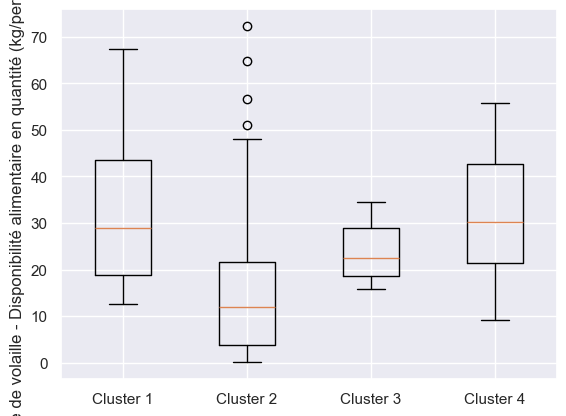

-----------------------------------------------------------------------------------------------------
Column: PIB (US$) par habitant
-----------------------------------------------------------------------------------------------------


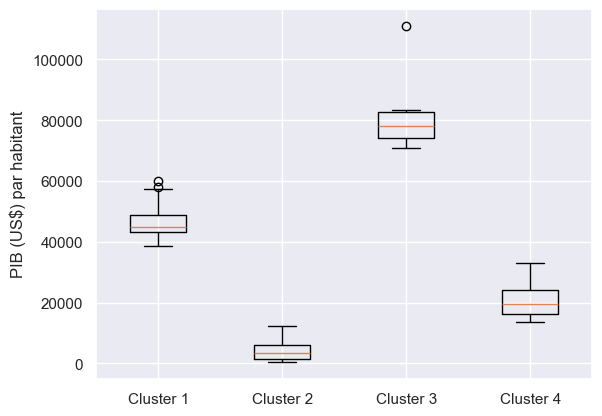

-----------------------------------------------------------------------------------------------------
Column: Stabilité Politique
-----------------------------------------------------------------------------------------------------


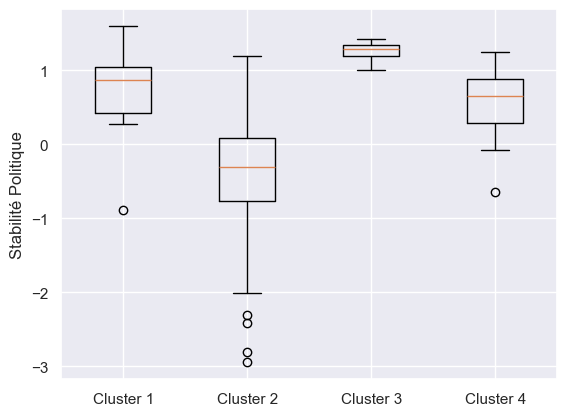

-----------------------------------------------------------------------------------------------------
Column: Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
-----------------------------------------------------------------------------------------------------


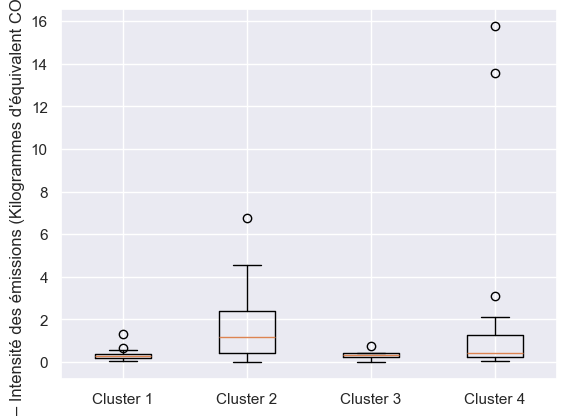

-----------------------------------------------------------------------------------------------------
Column: Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)
-----------------------------------------------------------------------------------------------------


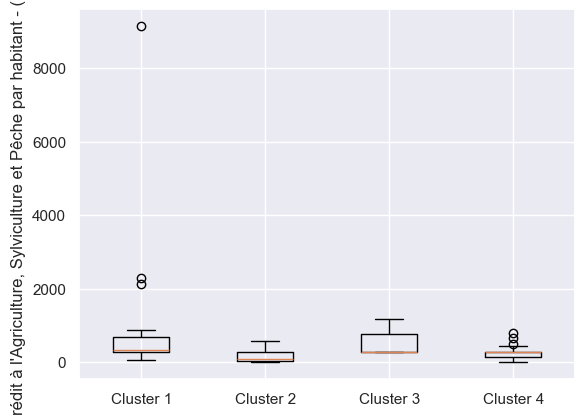

-----------------------------------------------------------------------------------------------------
Column: Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)
-----------------------------------------------------------------------------------------------------


In [41]:
#Create boxplots for each column and each cluster
columns = ['Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)',
 'PIB (US$) par habitant',
 'Stabilité Politique',
 "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)",
 "Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)",
 "Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"]

clusters_kmeans = [('Cluster 1', cluster1), ('Cluster 2', cluster2), ('Cluster 3', cluster3), ('Cluster 4', cluster4)]

for column in columns:
    print('-----------------------------------------------------------------------------------------------------')
    print("Column:", column)
    print('-----------------------------------------------------------------------------------------------------')

    data = [cluster[column] for _, cluster in clusters_kmeans]
    labels = [cluster_name for cluster_name, _ in clusters_kmeans]

    plt.boxplot(data, labels=labels)
    plt.ylabel(column)
    plt.show()

-----------------------------------------------------------------------------------------------------
Column: Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
-----------------------------------------------------------------------------------------------------


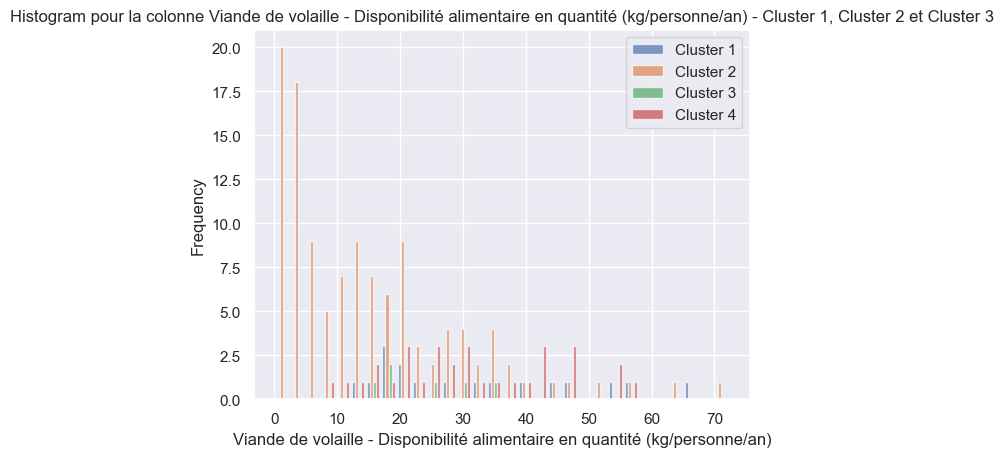

-----------------------------------------------------------------------------------------------------
Column: PIB (US$) par habitant
-----------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------
Column: Stabilité Politique
-----------------------------------------------------------------------------------------------------


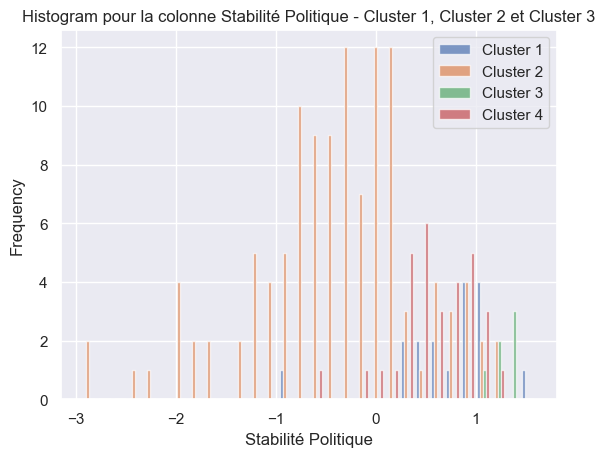

-----------------------------------------------------------------------------------------------------
Column: Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
-----------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------
Column: Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)
-----------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------
Column: Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)
-----------------------------------------------------------------------------------------------------


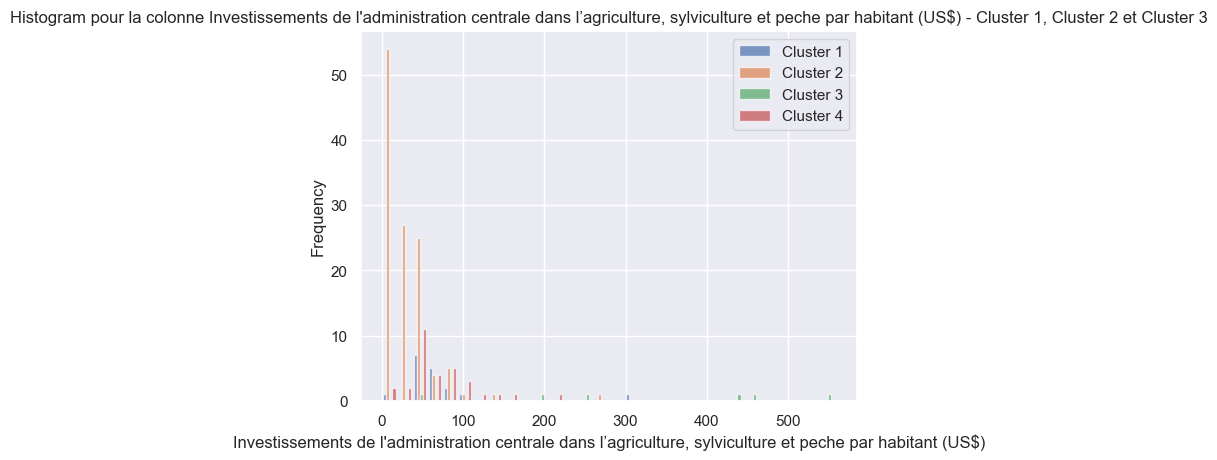

In [42]:
#Create histograms for each column and each cluster

for column in columns:
    print('-----------------------------------------------------------------------------------------------------')
    print("Column:", column)
    print('-----------------------------------------------------------------------------------------------------')

    data = [cluster[column] for _, cluster in clusters_kmeans]

    plt.hist(data, bins=30, alpha=0.7, label=[cluster_name for cluster_name, _ in clusters_kmeans])
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram pour la colonne {column} - Cluster 1, Cluster 2 et Cluster 3")
    plt.legend()
    plt.show()
    

- Cluster 1 – Faible revenu, politiquement instable, faible disponibilité de poulet, faible crédit et investissement
- Cluster 2 – Revenu élevé, stabilité politique moyenne, disponibilité élevée de poulet, crédit élevé disponible et faibles émissions
- Cluster 3 – Revenu moyen, stabilité politique moyenne, disponibilité élevée de poulet, émissions moyennes, crédit et investissement moyens.
- Cluster 4 – Revenu élevé, politiquement stable, faible consommation de poulet


Cluster 2 is the best
- Countries to examine - HAC

     - Germany / Australia / Austria / Belgium / Canada / China - Hong Kong SAR / Denmark / Finland / France / Israel / Japan / New Zealand / Netherlands / United Kingdom of Great Britain and Northern Ireland / Sweden / United Arab Emirates / United States of America
    
- Countries to examine - k-means
     - Finland / Ireland / Iceland / Luxembourg / Norway / New Zealand / Switzerland
    
Crossover - Finland, New Zealand

## PCA

In [43]:
# Separate the quantitative values
quant_variables = analyse.drop(columns='Zone')

X=quant_variables.values

In [44]:
#Start the scaler
scaler = StandardScaler()

#Train the scaler and transform the data
X_scaled = scaler.fit_transform(X)

#Confirm the tha mean is 0 and the standard distribution is 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5
mean -0.0  0.0  0.0  0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

In [45]:
#Create a PCA and train it 
n_components = 6

pca = PCA(n_components=n_components)

pca.fit_transform(X_scaled)

array([[-2.63522628, -1.34504074, -0.40448686,  0.44900012,  1.7000797 ,
         0.32445507],
       [-0.10576326, -0.06214589,  0.21660868, -1.17749671,  0.47379403,
        -0.23880423],
       [-0.34090944, -0.1351791 , -0.14461784, -0.41074843, -0.73678664,
        -0.19973308],
       ...,
       [ 2.52079312,  0.38424022, -0.31482336, -1.33391985,  1.13324829,
         1.26486352],
       [-2.22673196, -0.14905047, -0.030036  ,  0.92871143,  0.61414174,
         0.34886563],
       [-0.64292056, -0.5014072 ,  0.02431459,  0.29479869, -0.85464857,
        -0.2523644 ]])

In [46]:
#Create a data variance table explaining the main components of the data
pca.explained_variance_ratio_

array([0.41716842, 0.17394802, 0.14704584, 0.13234165, 0.08042995,
       0.04906612])

In [47]:
#Multiply by 100 to see the main components as percentages
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([41.72, 17.39, 14.7 , 13.23,  8.04,  4.91])

In [48]:
#Create a list with cumulative sums
scree_cum = scree.cumsum().round()
scree_cum

array([ 42.,  59.,  74.,  87.,  95., 100.])

In [49]:
# Define a variable with the list of components:
x_list = range(1, n_components+1)

In [50]:
#Create a scree plot
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rank of the axis of inertia")
plt.ylabel("Percentage of inertia")
plt.title("Scree plot of Eigenvalues")
plt.show(block=False)

I'm going to use 4 dimensions - 87% inertia

In [51]:
#Get the components
pcs = pca.components_

#Create a dataframe with the components
pcs = pd.DataFrame(pcs)

In [52]:
#Select quantitative columns
features = analyse.copy().drop(columns='Zone').columns

In [53]:
#Create the dataframe using the variable 'features'
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
F1                                               0.37                             
F2                                               0.44                             
F3                                               0.13                             
F4                                              -0.65                             
F5                                               0.46                             
F6                                              -0.16                             

    PIB (US$) par habitant  Stabilité Politique  \
F1                    0.55                 0.50   
F2                   -0.07                 0.17   
F3                   -0.15                 0.05   
F4                    0.16                -0.14   
F5                    0.16                -0.83   
F6                    0.79                -0.13   

    Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
F1                                               0.27                    
F2                                              -0.33                    
F3                                               0.86                    
F4                                               0.23                    
F5                                               0.13                    
F6                                              -0.13                    

    Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
F1                                              -0.16                                        
F2                                               0.82                                        
F3                                               0.26                                        
F4                                               0.47                                        
F5                                              -0.01                                        
F6                                               0.14                                        

    Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
F1                                               0.46                                                          
F2                                               0.02                                                          
F3                                              -0.40                                                          
F4                                               0.51                                                          
F5                                               0.25                                                          
F6                                              -0.55

<Axes: >

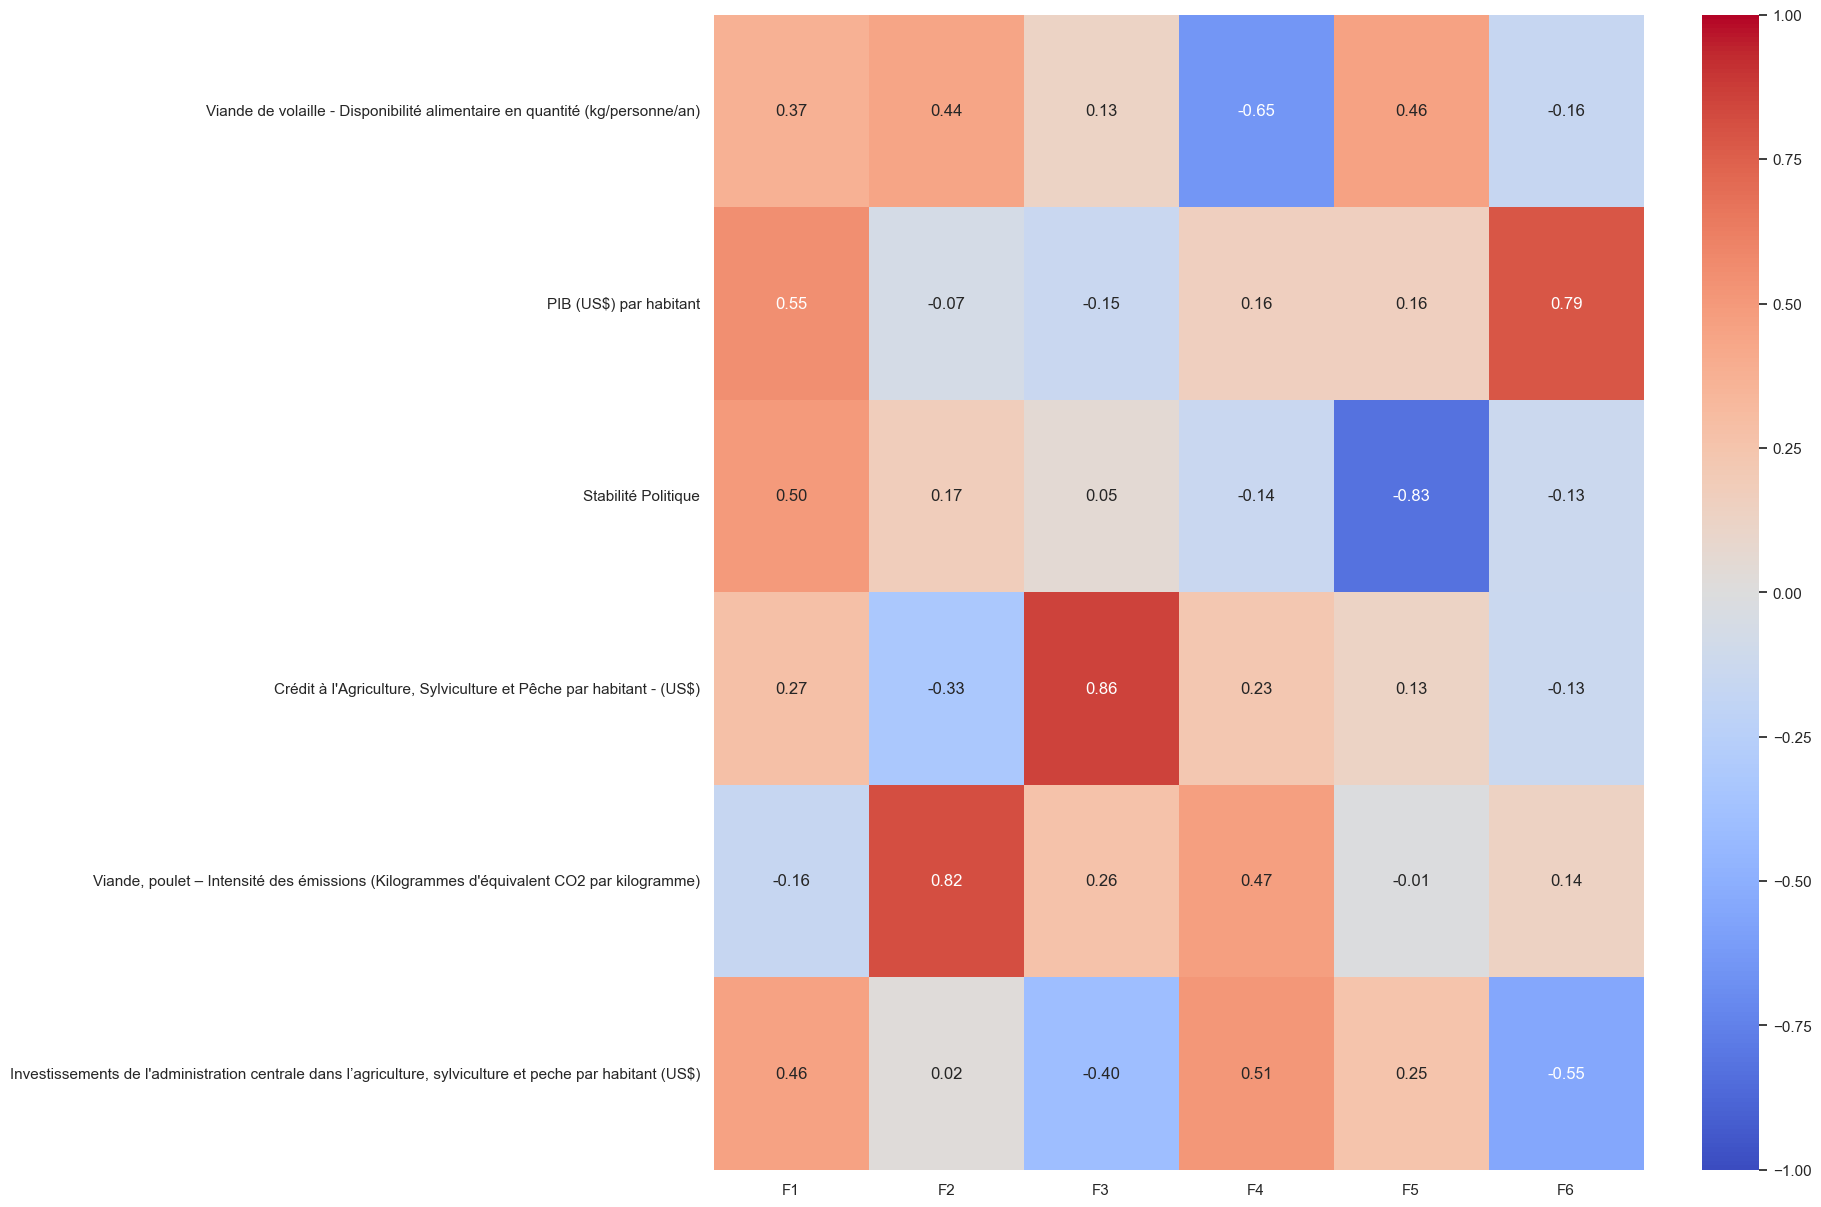

In [54]:
#Create a heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [55]:
#Create a function for a correlation graph
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Displays the correlation graph

     Positional arguments:
     -----------------------------------
     pca: sklearn.decomposition.PCA: our PCA object which has been fitted
     x_y: list or tuple: the pair x,y of the plans to display, example [0,1] for F1, F2
     features: list or tuple: the list of features (ie dimensions) to represent
     """

    # Extract x and y
    x,y=x_y

    # Size of the image (in inches)
    fig, ax = plt.subplots(figsize=(20, 18))

    # For each component: 
    for i in range(0, pca.components_.shape[1]):

        # The arrows
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # The labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Show the horizontal and vertical lines
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Name of the axis, with the percentage of inertia
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Correlation circle (F{} and F{})".format(x+1, y+1))

    # The circle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axis and display
    plt.axis('equal')
    plt.show(block=False)

In [56]:
#Correlation graph for F1, F2
x_y = (0,1)

correlation_graph(pca, x_y, features)

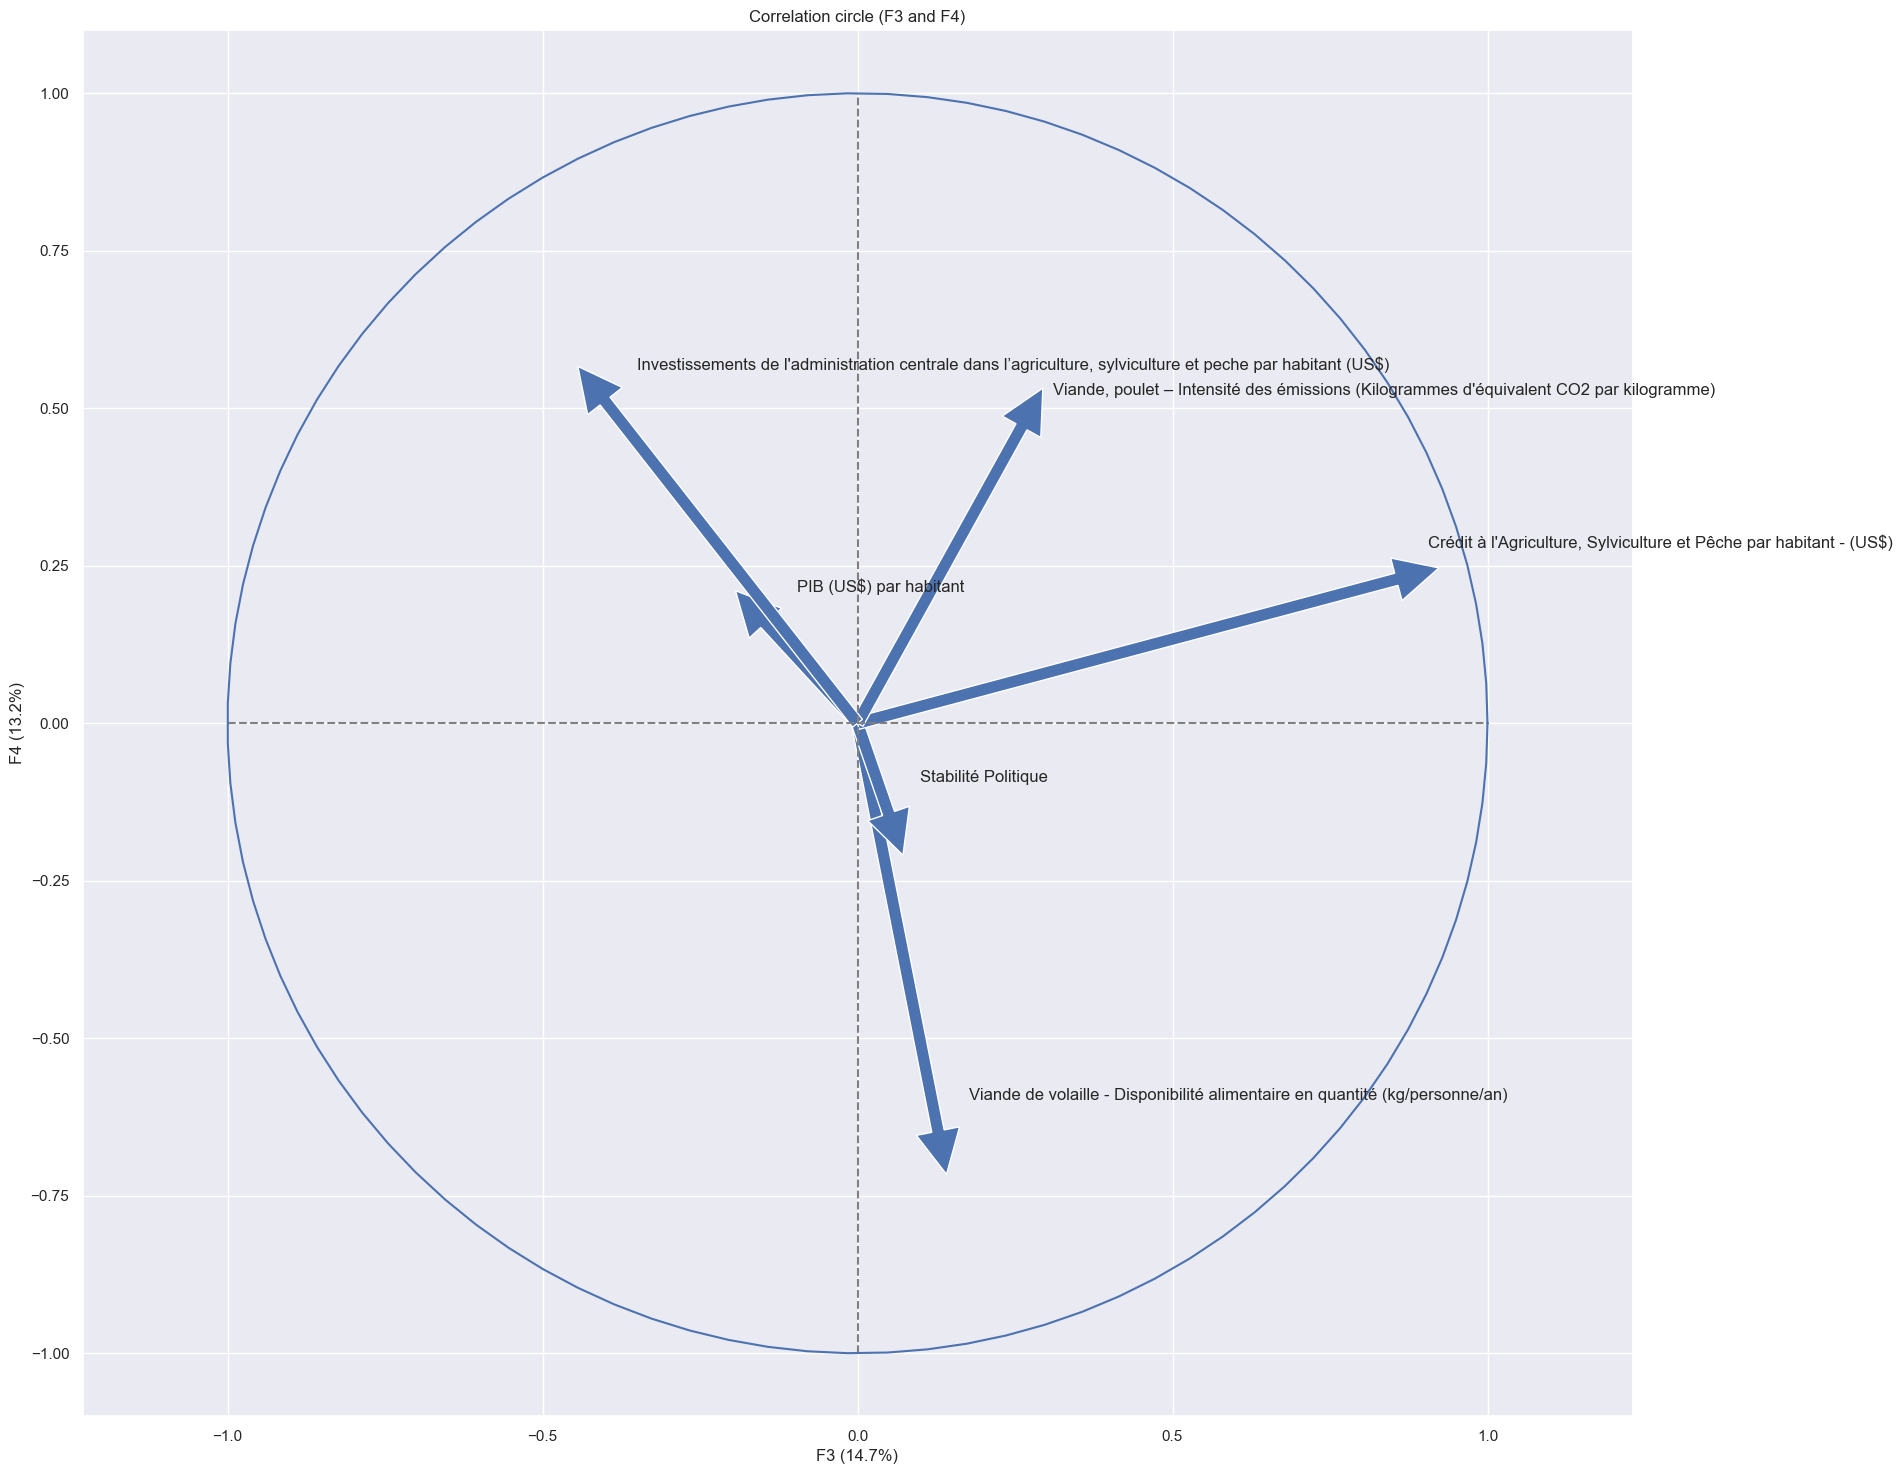

In [57]:
#Correlation graph for F3, F4
x_y = (2,3)

correlation_graph(pca, x_y, features)

- F1 - Rich countries have higher political stability and GDP
    - GDP (US\\$) per capita
    - Political Stability
- F2 - Emissions from production of poultry meat
    - Meat, chicken – Emissions intensity (Kilograms of CO2 equivalent per kilogram)
- F3 - Countries with less access to credit for agriculture receive more government investment
    - Credit to Agriculture, Forestry and Fisheries per capita - (US\\$)
    - Central government investments in agriculture, forestry and fishing per capita (US\\$)
- F4 - Countries with high access to credit for agriculture have less chicken meat available and their production of chicken creates more emissions per kg
   - Credit to Agriculture, Forestry and Fisheries per capita - (US\\$)
    - Meat, chicken – Emissions intensity (Kilograms of CO2 equivalent per kilogram)
    - Central government investments in agriculture, forestry and fishing per capita (US\\$)

In [58]:
#Calculate the coordinates of individuals in the new space
X_proj = pca.fit_transform(X_scaled)
X_proj[:5]

array([[-2.63522628e+00, -1.34504074e+00, -4.04486856e-01,
         4.49000119e-01,  1.70007970e+00,  3.24455074e-01],
       [-1.05763263e-01, -6.21458891e-02,  2.16608683e-01,
        -1.17749671e+00,  4.73794029e-01, -2.38804228e-01],
       [-3.40909436e-01, -1.35179104e-01, -1.44617836e-01,
        -4.10748427e-01, -7.36786638e-01, -1.99733077e-01],
       [-1.15520487e+00, -3.61968638e-01, -1.59596020e-03,
         6.69938922e-01,  2.92169807e-01, -7.52225213e-02],
       [ 1.45821067e+00, -6.14276293e-01,  1.55423453e-01,
         6.42837809e-02, -2.94466490e-01,  1.01124134e+00]])

In [59]:
#Create the function for factorial planes
def display_factorial_planes_interactive(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10, 8], marker="."):
    """
    Shows the projection of individuals interactively with Plotly.

     Positional arguments:
     --------------------------
     X_projected: np.array, pd.DataFrame, list of list: the matrix of projected points
     x_y: list or tuple: the pair x, y of the plans to display, example [0,1] for F1, F2

     Optional arguments:
     --------------------------
     pca: sklearn.decomposition.PCA: a PCA object that has been fitted, this will allow us to display the variance of each component, default = None
     labels: list or tuple: the labels of the individuals to project, default = None
     clusters: list or tuple: the list of clusters to which each individual belongs, default = None
     alpha: float in [0,1]: transparency parameter, 0=100% transparent, 1=0% transparent, default = 1
     figsize: list or tuple: couple width, height which defines the size of the figure in inches, default = [10.8]
     marker: str: the type of marker used to represent individuals, cross points etc etc, default = "."
    """

    # Transform X_projected into np.array
    X_ = np.array(X_projected)

    # Define the form of the shape
    if not figsize:
        figsize = (7, 6)

    # Create labels
    if labels is None:
        labels = []

    # Verify the axes of the variables
    if not len(x_y) == 2:
        raise AttributeError("2 axes are required")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("The axis variable is not good")

    # Define x and y
    x, y = x_y

    # The points
    df = pd.DataFrame({'F1': X_[:, x], 'F2': X_[:, y], 'Labels': labels, 'Cluster': clusters})

    # Max x and max y values
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # Create an interactive scatter plot with hover labels
    fig = px.scatter(df, x='F1', y='F2', color='Cluster', size_max=20, opacity=alpha, hover_name='Labels')

    # Update layout for better presentation
    fig.update_layout(
        title=f"Projection of individuals (on F{x+1} and F{y+1})",
        xaxis_title=f'F{x+1} {"(explained variance: " + str(round(100*pca.explained_variance_ratio_[x])) + "%)" if pca else ""}',
        yaxis_title=f'F{y+1} {"(explained variance: " + str(round(100*pca.explained_variance_ratio_[y])) + "%)" if pca else ""}',
        xaxis_range=[-x_max, x_max],  # Set x-axis range
        yaxis_range=[-y_max, y_max],  # Set y-axis range
    )

    # Show the interactive plot
    fig.show()

In [60]:
#Create names for labels
names = analyse['Zone'].values

#K-means clustering - F1 and F2
display_factorial_planes_interactive(X_proj, [0, 1], pca, labels=names, figsize=(10, 20), clusters=df_kmeans['Cluster'], marker="o")

In [61]:
#K-means clustering - F3 and F4
display_factorial_planes_interactive(X_proj, [2, 3], pca, labels=names, figsize=(10, 20), clusters=df_kmeans['Cluster'], marker="o")

In [62]:
#Clustering de CAH - F1 et F2
display_factorial_planes_interactive(X_proj, [0, 1], pca, labels=names, figsize=(10, 20), clusters=df_CAH['cluster'], marker="o")


In [63]:
#Clustering de CAH - F3 et F4
display_factorial_planes_interactive(X_proj, [2, 3], pca, labels=names, figsize=(10, 20), clusters=df_CAH['cluster'], marker="o")


In [64]:
#Create an interative factorial plane
def display_pays_factorial(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10, 8], marker="."):
    """
    Shows the projection of individuals interactively with Plotly.

      Positional arguments:
      --------------------------
      X_projected: np.array, pd.DataFrame, list of list: the matrix of projected points
      x_y: list or tuple: the pair x, y of the plans to display, example [0,1] for F1, F2

      Optional arguments:
      --------------------------
      pca: sklearn.decomposition.PCA: a PCA object that has been adapted, this will allow us to display the variance of each component, by default = None
      labels: list or tuple: the labels of the individuals to project, default = None
      clusters: list or tuple: the list of clusters to which each individual belongs, default = None
      alpha: float in [0,1]: transparency parameter, 0=100% transparent, 1=0% transparent, default = 1
      figsize: list or tuple: couple width, height which defines the size of the figure in inches, default = [10.8]
      Marker: str: the type of marker used to represent individuals, cross stitches etc etc, default = "."

      Back:
      --------------------------
      df_projected: pd.DataFrame: DataFrame containing the projected values (F1, F2, F3, F4) for each individual (country)
    """

    # Transform X_projected into np.array
    X_ = np.array(X_projected)

    # Managae the labels
    if labels is None:
        labels = []

    # Verify the axes of the variable
    if not len(x_y) == 2:
        raise AttributeError("2 axes are required")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("The axis variable is not good")

    # Define x and y
    x, y = x_y

    # Ensure all arrays have the same length
    if not (len(X_) == len(labels) == len(clusters)):
        raise ValueError("All arrays must be of the same length")

    # The points
    df = pd.DataFrame({
        'F1': X_[:, x],
        'F2': X_[:, y],
        'F3': pca.components_[2, x] * X_[:, x] + pca.components_[2, y] * X_[:, y] if pca else np.nan,
        'F4': pca.components_[3, x] * X_[:, x] + pca.components_[3, y] * X_[:, y] if pca else np.nan,
        'Labels': labels,
        'Cluster': clusters
    })

    # Return the DataFrame with projected values
    return df

In [65]:
#Create a dataframe with the countries and their values for each 'factorial plane'
Pays_F = display_pays_factorial(X_proj, [0, 1], pca, labels=names, clusters=df_kmeans['Cluster'], figsize=(10, 20), marker="o")

In [66]:
# Find the top 10 countries in terms of values for each factorial plane

# Top 10 countries - F1 - Economic prosperity
F1 = Pays_F[['Labels', 'F1']].sort_values(by='F1', ascending=False).head(10)
# Top 10 countries - F2 - Quantity of emissions (ascending values because less is better)
F2 = Pays_F[['Labels', 'F2']].sort_values(by='F2').head(10)
# Top 10 countries - F3 - Agricultural credit
F3 = Pays_F[['Labels', 'F3']].sort_values(by='F3', ascending=False).head(10)
# Top 10 countries - F4 - Need for investment in agriculture (ascending values because less is more)
F4 = Pays_F[['Labels', 'F4']].sort_values(by='F4').head(10)

In [67]:
# Count the number of times countries rank among the top 10 countries in terms of factorial designs (max 4)

# List of dataframes
dataframes = [F1, F2, F3, F4]

# Start a dictionary
country_counts = {}

# Go through each DataFrame and count the number of times the country is in the top 10 in a factorial design
for df in dataframes:
    unique_countries = set(df['Labels'])
    for country in unique_countries:
        country_counts[country] = country_counts.get(country, 0) + 1

# Convert dictionary to a list of tuples (country, number)
countries_and_counts = list(country_counts.items())
countries_counts = pd.DataFrame(countries_and_counts, columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

In [68]:
# Find countries that are in the top 10 for 3/4 or 4/4 factorial planes
countries_counts = countries_counts[countries_counts['Count'].isin([3,4])]
countries_counts

Country  Count
5       Nouvelle-Zélande      4
0                Islande      3
6                 Suisse      3
14              Pays-Bas      3
1              Australie      3
7                Norvège      3
9               Finlande      3
4             Luxembourg      3
3   Chine - RAS de Macao      3
2                Irlande      3

In [70]:
# Check the quantitative values for these countries to identify the most interesting options
countries = list(countries_counts.Country)
population = pd.read_csv('analyse_population.csv')
population = population[population['Zone'].isin(countries)]

interesting_countries = pd.merge(population, analyse, how='left', on='Zone')
interesting_countries

Zone  Population  \
0             Australie  24584620.0   
1  Chine - RAS de Macao    622585.0   
2              Finlande   5511371.0   
3               Irlande   4753279.0   
4               Islande    334393.0   
5            Luxembourg    591910.0   
6               Norvège   5296326.0   
7      Nouvelle-Zélande   4702034.0   
8              Pays-Bas  17021347.0   
9                Suisse   8455804.0   

   Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                              47.65                             
1                                              34.47                             
2                                              18.76                             
3                                              25.82                             
4                                              29.95                             
5                                              18.33                             
6                                              19.05                             
7                                              34.79                             
8                                              20.33                             
9                                              15.72                             

   PIB (US$) par habitant  Stabilité Politique  \
0            57444.151955                 0.90   
1            81018.552734                 1.43   
2            46385.550876                 1.08   
3            70767.463926                 1.00   
4            73949.769215                 1.35   
5           111017.182246                 1.33   
6            75220.814442                 1.17   
7            43943.484628                 1.60   
8            48989.638816                 0.92   
9            83313.013992                 1.26   

   Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)  \
0                                        2115.878640                    
1                                         261.808033                    
2                                         339.003923                    
3                                         929.026829                    
4                                         261.808033                    
5                                         261.808033                    
6                                         261.808033                    
7                                        9147.009709                    
8                                        2291.704118                    
9                                        1169.778908                    

   Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)  \
0                                             0.2235                                        
1                                             0.7279                                        
2                                             0.1376                                        
3                                             0.2934                                        
4                                             0.0078                                        
5                                             0.1872                                        
6                                             0.4311                                        
7                                             0.3147                                        
8                                             0.1977                                        
9                                             0.3181                                        

   Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)  
0                                          84.359652                                                          
1                                          52.622785                                 

**Australasia**
- Benefits
     - *Australia has a large population, and out of the countries on this list, New Zealand and Australia have the largest amount of chicken available as food.*
- Disadvantages
     - *Far from France - difficult to run a business remotely, and the laws and regulations will be different from those in the EU and France, which could make the business more difficult to manage.*
<p>&nbsp;</p>

**Europe (European countries)**
- Strategy
     - *Start by focusing on the Netherlands and Ireland, which have a good balance between population size and the amount of chicken available.*
- Benefits
     - *These 2 countries are part of the EU - exporting chicken will have relatively low costs, especially compared to those required to export to Australasia, and laws and regulations will be standardized across the EU, and therefore easier to respect.*
- Disadvantages
     - *Chicken availability is lower than in Australasia and populations are more distributed*
<p>&nbsp;</p>

**Macau** - Macau's population is too small and the country is too far from other countries to make it worth investing there.